# Introduction 
In this project we are creating an algorithm to predict the projectile of the photon after we fire it directly on a medium. For this project, we are only taking lead as the material of the medium.

# Theory
As photon strikes through a medium, there are different possible interactions that can occur. However, for this algorithm, we are only accounting for compton scattering. 

# Outline
This project will be broken down into 3 parts, part 1 will be on finding the probability of compton scattering occuring and it's application into the algorithm. Part 2 will be on calculating the angle of scattering with the help of stochastic and equations. Part 3 will be the final code where we will integrate part 1 and part 2 together.

# Part 1 (Finding the probability of compton scattering in lead)


To find the probability of compton scattering occuring, we used the linear attenuation value available online to create a dataset for each correspoinding Energy value. We then use the formula 
\begin{equation}
                                          P=1-exp(-du)
\end{equation}                                    
Where P is the probability of interaction, d = length of material photon is passing through, u = linear attenuation coefficient.
In the real world context, there are multiple possible interactions that may occur. However, in this case, we are assuming that only compton scattering can occur.



In this project, using the linear attenuation table available online and the equation above, we will create an array for lead representing the energy level corresponding to their probability.

We will create an array ranging from 0.1 MeV to 1 MeV.

In [2]:
import numpy as np
import math
import random
# Create a 3 by 10 array, first row represents Energy, second row represents corresponding linear attenuation coefficient
# , third row represents corresponding probability
array = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                  [0.489, 0.088, 0.0355, 0.0205, 0.0142, 0.01108, 0.00941, 0.00781, 0.00704,0.00626],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])


d=100



for j in range(10):
        u=array[1,j]
        P=1-(math.e)**(-d*u)
        array[2,j]=P

# Print the resulting array
print("Array:")
print(array)




Array:
[[0.1        0.2        0.3        0.4        0.5        0.6
  0.7        0.8        0.9        1.        ]
 [0.489      0.088      0.0355     0.0205     0.0142     0.01108
  0.00941    0.00781    0.00704    0.00626   ]
 [1.         0.99984927 0.97127536 0.8712651  0.75828598 0.66978126
  0.6097626  0.54205217 0.50539707 0.46527357]]


Now let us create a function that returns 1 when interaction occurs and 0 when no interactions occur. This is done using probability retrieve from the array created.


In [3]:
def RetrieveProb(Array,Energy):
    rounded_number = round(Energy, 1)
    indices = np.where(Array == rounded_number)

    if len(indices[0]) > 0:
        column_index = indices[1][0]
        #print( array[2,column_index])
        random_number = random.random()
        if (Array[2,column_index]<=random_number):
            return 0
        else:
            return 1
    else:
        return 0
RetrieveProb(array,0.1)

1

# Part 2 (Accouting compton scattering into the algorithm)


As compton scattering occur, the angle that it scatter can be stochastic. However, it do have a distribution pattern following the Klein-Nishina formula which gives the differential cross-section. Using it, we then plot the differential cross-section as a function of scattering angle on thetha ranging from 0 to 180.


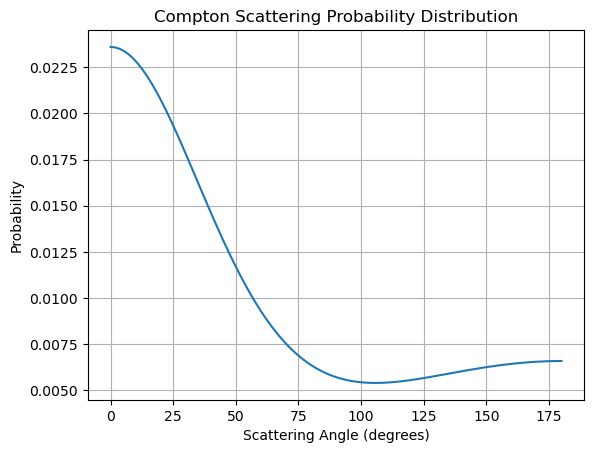

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import random

# Constants
r0 = 2.82e-13  # Classical electron radius in cm

# Incident photon energy (in MeV)
E = 0.3


# Array of scattering angles (in degrees)
theta_degrees = np.linspace(0, 180, 100)

# Convert angles to radians
theta_radians = np.deg2rad(theta_degrees)

# Calculate differential cross-section for each angle
differential_cross_section = (r0**2 / 2) * ((1 / (1 * (1 + (E / 0.511) * (1 - np.cos(theta_radians))))**2) * (1 / (1 * (1 + (E / 0.511) * (1 - np.cos(theta_radians)))) + (1 * (1 + (E / 0.511) * (1 - np.cos(theta_radians))))  - np.sin(theta_radians)**2))


# Integrate the differential cross-section over all angles
total_area = spi.simps(differential_cross_section, theta_radians)

# Normalize the differential cross-section to obtain the probability distribution
probability_distribution = differential_cross_section / total_area

# Normalize the probability distribution to ensure its sum equals 1
probability_distribution /= np.sum(probability_distribution)





# Plot probability distribution
plt.plot(theta_degrees, probability_distribution)
plt.xlabel('Scattering Angle (degrees)')
plt.ylabel('Probability')
plt.title('Compton Scattering Probability Distribution')
plt.grid(True)
plt.show()

Now that we have the probability distrubution curve which is dependent on incident photon energy E, we now need to 
add a code so that we can retreive samples from this probability. From the code below, we can see that x needs to be large such 
that it display a similar pattern to the probability distribution graph above.


The integral with uniform sampling gave a result of 8.2984e-24 with a variance of 9.9612e-54


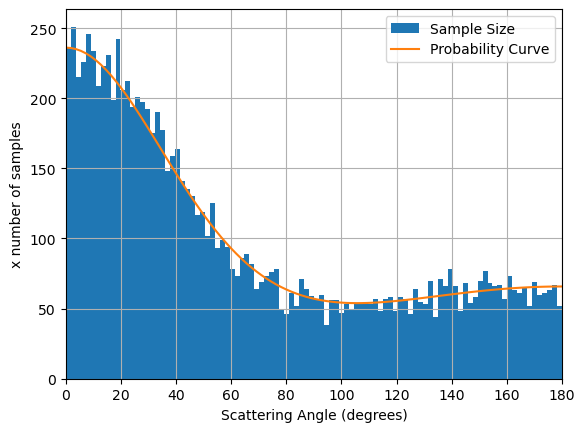

In [51]:
r0 = 2.82e-13  # Classical electron radius in cm

# Incident photon energy (in MeV)
E =0.3

# x = number of samples we are taking
x=10000

# Array of scattering angles (in degrees)
theta_degrees = np.linspace(0, 180, 100)

# Convert angles to radians
theta_radians = np.deg2rad(theta_degrees)

# Calculate differential cross-section for each angle
differential_cross_section = (r0**2 / 2) * ((1 / (1 * (1 + (E / 0.511) * (1 - np.cos(theta_radians))))**2) * (1 / (1 * (1 + (E / 0.511) * (1 - np.cos(theta_radians)))) + (1 * (1 + (E / 0.511) * (1 - np.cos(theta_radians))))  - np.sin(theta_radians)**2))


# Integrate the differential cross-section over all angles
total_area = spi.simps(differential_cross_section, theta_radians)

# Normalize the differential cross-section to obtain the probability distribution
probability_distribution = differential_cross_section / total_area

# Normalize the probability distribution to ensure its sum equals 1
probability_distribution /= np.sum(probability_distribution)

# Draw a random sample
sample = np.random.choice(theta_degrees,size = x, p=probability_distribution)

# Plotting sample on histogram
plt.hist(sample ,bins = 100, label='Sample Size');
plt.xlim(0.,180.); plt.xlabel("Scattering Angle (degrees)"); plt.ylabel("x number of samples"); 

plt.plot(theta_degrees, probability_distribution*x, label='Probability Curve')
plt.grid(True)

plt.legend()


#calculating variance

functionToIntegrate = lambda z: (r0**2 / 2) * ((1 / (1 * (1 + (E / 0.511) * (1 - np.cos(z))))**2) * (1 / (1 * (1 + (E / 0.511) * (1 - np.cos(z)))) + (1 * (1 + (E / 0.511) * (1 - np.cos(z))))  - np.sin(z)**2))


xmin = 0; xmax = 180;

theta_radians2 = np.deg2rad(sample)
## Uniform integrator


ensembleAverage =  np.sum(functionToIntegrate(theta_radians2)) /x
ensemblesquaredAverage =  np.sum(functionToIntegrate(theta_radians2)**2) /x

valueUniform = (xmax-xmin) * ensembleAverage
varianceSquaredUniform = (xmax-xmin) * (ensemblesquaredAverage - ensembleAverage**2)/(x-1)
print("The integral with uniform sampling gave a result of {:.4e} with a variance of {:.4e}".format(valueUniform,varianceSquaredUniform))


Now, that's try to make a function that returns an angle with the probability based on the parameters given.


In [6]:
def RetrieveAngle(E):
    r0 = 2.82e-13  # Classical electron radius in cm 

    # Array of scattering angles (in degrees)
    theta_degrees = np.linspace(0, 180, 181)

    # Convert angles to radians
    theta_radians = np.deg2rad(theta_degrees)

    # Calculate differential cross-section for each angle
    differential_cross_section = (r0**2 / 2) * ((1 / (1 * (1 + (E / 0.511) * (1 - np.cos(theta_radians))))**2) * (1 / (1 * (1 + (E / 0.511) * (1 - np.cos(theta_radians)))) + (1 * (1 + (E / 0.511) * (1 - np.cos(theta_radians))))  - np.sin(theta_radians)**2))


    # Integrate the differential cross-section over all angles
    total_area = spi.simps(differential_cross_section, theta_radians)

    # Normalize the differential cross-section to obtain the probability distribution
    probability_distribution = differential_cross_section / total_area

    # Normalize the probability distribution to ensure its sum equals 1
    probability_distribution /= np.sum(probability_distribution)

    # Draw a random sample
    sample = np.random.choice(theta_degrees,size = 1, p=probability_distribution)
 

    # Randomly choose whether to make x negative with a 50/50 probability as equal chance it will scatter in the negative plane
    if random.choice([True, False]):
        x = -1*sample
    else:
        x = 1*sample
    return x[0]
RetrieveAngle(30)

-2.0

# Part 3 (Code)


Putting all the code together, the parameters we can vary are the incident energy of the 1st photon and the length of lead used in the experiment 

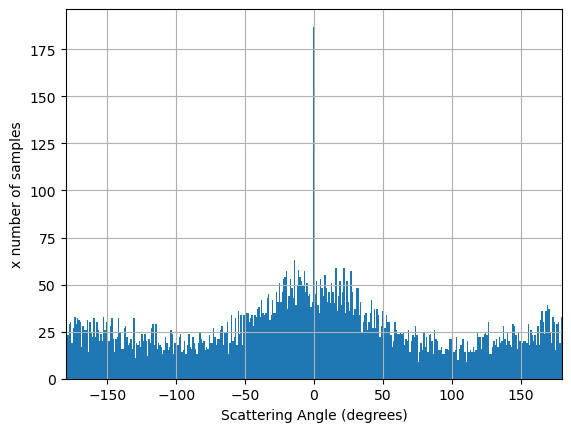

In [7]:
def Compton_Effect (Initial_E, Length, Size):
    #Initial_E is in terms of Mev
    # Create a 3 by 10 array, first row represents Energy, second row represents corresponding linear attenuation coefficient
    # , third row represents corresponding probability
    array = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                      [0.489, 0.088, 0.0355, 0.0205, 0.0142, 0.01108, 0.00941, 0.00781, 0.00704,0.00626],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
    d=Length
    for j in range(10):
            u=array[1,j]
            P=1-(math.e)**(-d*u)
            array[2,j]=P
            
       
    targets = np.zeros((Size, 1))        
#   Size = number of photons being shot at the medium
    for i in range(Size):
        if RetrieveProb(array,Initial_E)==0:
            targets[i]=0
        else:
            targets[i]=RetrieveAngle(Initial_E)
         
    plt.hist(targets ,bins = 361, label='Sample Size');
    plt.xlim(-180,180.); plt.xlabel("Scattering Angle (degrees)"); plt.ylabel("x number of samples"); 
    plt.grid(True)
    
Compton_Effect (0.1, 10, 10000)

# Finding Variance

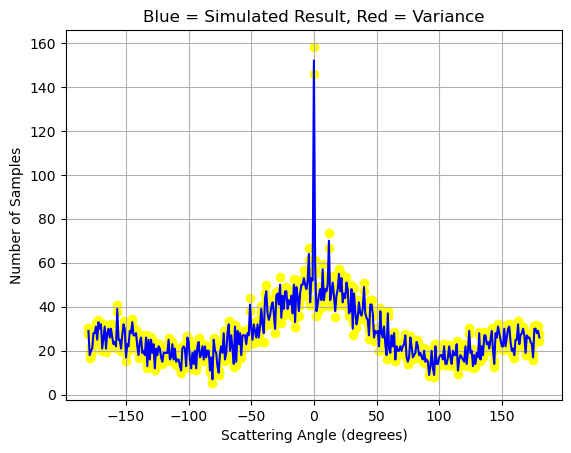

In [75]:
def Compton_Effect_Error (Initial_E, Length, Size, Number):
    #Initial_E  (in terms of Mev) = Energy of incident photon, ranging from 0.1 MeV to 1MeV
    #Length (in terms of cm) = length of lead 
    #Size = Number of sample taken in 1 simulation
    #Number = Number of times to run simulation to calculate variance
    
    
    
    
    # Create a 3 by 10 array, first row represents Energy, second row represents corresponding linear attenuation coefficient
    # , third row represents corresponding probability
    array = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                      [0.489, 0.088, 0.0355, 0.0205, 0.0142, 0.01108, 0.00941, 0.00781, 0.00704,0.00626],
                      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
    d=Length
    for j in range(10):
            u=array[1,j]
            P=1-(math.e)**(-d*u)
            array[2,j]=P
            
    Counter = np.empty((Number, 361))   
    
    targets = np.zeros((Size, 1))        
#   Size = number of photons being shot at the medium
   
    for p in range (Number):
        
        for i in range(Size):
            if RetrieveProb(array,Initial_E)==0:
                targets[i]=0
            else:
                targets[i]=RetrieveAngle(Initial_E)
        
        for o in range(361):

            count_of_o = np.count_nonzero(targets == o-180)
            Counter[p][o]=count_of_o # an array storing the number of samples at each degree
    ensembleAverage = (np.sum(Counter, axis=0)/Number)
    squaredArray = Counter**2
    ensemblesquaredAverage = (np.sum(squaredArray, axis=0)/Number)
    
    Variance_at_each_degree_array = (ensemblesquaredAverage - ensembleAverage**2)/(Number-1)
    
    array_shape = Variance_at_each_degree_array.shape
    x_values = np.linspace(-180, 180, num=len(Counter[0]))

    Positive_variance = Counter[0]+Variance_at_each_degree_array
    Negative_variance = Counter[0]-Variance_at_each_degree_array
    
  
    plt.plot(x_values, Counter[0], color='blue')
    plt.scatter(x_values, Positive_variance, color='yellow')#upper limit
    plt.scatter(x_values, Negative_variance, color='yellow')#lower limit
    plt.xlabel('Scattering Angle (degrees)')
    plt.ylabel('Number of Samples')
    plt.title('Blue = Simulated Result, Red = Variance')
    plt.grid(True)
    plt.show()


   
Compton_Effect_Error (0.1, 10, 10000,20)


# Test case :
Energy = 0.3 MeV
Length = 200 cm
Size = 10000
Number = 5

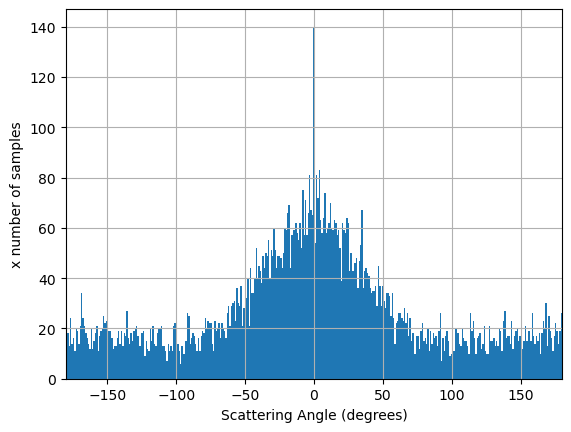

In [81]:
Compton_Effect (0.3,200, 10000)


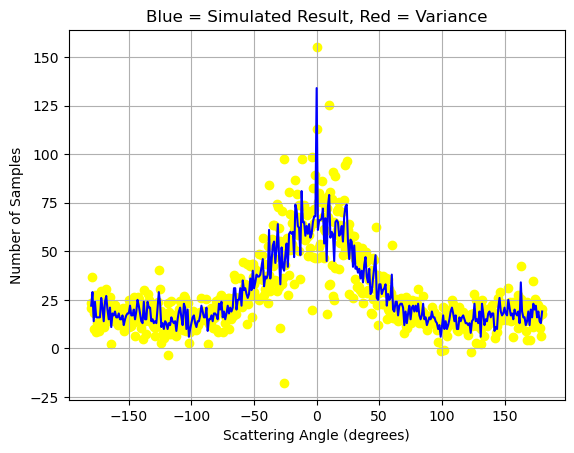

In [82]:
Compton_Effect_Error (0.3, 200, 10000,5)